In [1]:
import pandas as pd
from io import StringIO
import os

In [10]:
import matplotlib.pyplot as plt

In [2]:
def read_trace(trace_dir, trace_file, worker_id=None):
    trace_filepath = os.path.join(trace_dir, trace_file)
    
    with open(trace_filepath,"r") as rf:
        new_trace = StringIO()
        line = rf.readline()
        while line:
            line_list = line.split()
            if line_list[0] == "[trace]":
                new_trace.write(line)
            line = rf.readline()
       
    new_trace.seek(0)
    df = pd.read_csv(new_trace, sep=" ", names=["InfoType", "EventType", "EventState", "ID", "Time"])
    del df["InfoType"]
    
    if worker_id is not None:
        df.insert(0, "WorkerID", worker_id)
        
    new_trace.close()
    
    return df

In [3]:
trace_dir = "/home/posheng/billy_ws/fl_025/paslab/trace/sync_vs_async"
coord_trace_file = "coord.txt"

In [4]:
coord_df = read_trace(trace_dir, coord_trace_file)

In [9]:
acc_list = list(coord_df[coord_df["EventType"] == "TestAccuracy"]["Time"])

In [11]:
acc_list

[68.87,
 81.44,
 81.86,
 89.66,
 92.16,
 93.93,
 96.06,
 95.75,
 93.28,
 96.61,
 96.88,
 96.83,
 97.38,
 97.43,
 96.76,
 97.21,
 97.56,
 97.71,
 97.6,
 97.46,
 97.61]

In [17]:
round_list = list(range(1, len(acc_list)))

In [27]:
async_time_series = [i * 17.02 for i in round_list]

In [28]:
sync_time_series = [i * 378.9 for i in round_list]

In [29]:
sync_time_series

[378.9,
 757.8,
 1136.6999999999998,
 1515.6,
 1894.5,
 2273.3999999999996,
 2652.2999999999997,
 3031.2,
 3410.1,
 3789.0,
 4167.9,
 4546.799999999999,
 4925.7,
 5304.599999999999,
 5683.5,
 6062.4,
 6441.299999999999,
 6820.2,
 7199.099999999999,
 7578.0]

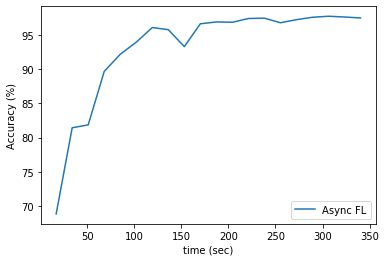

In [38]:
plt.xlabel('time (sec)')
plt.ylabel('Accuracy (%)')
p, = plt.plot(async_time_series, acc_list[:20])
p_list = [p]
plt.legend(p_list, ["Async FL"], loc='lower right')

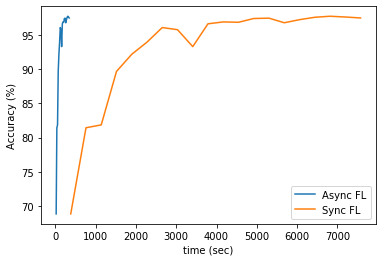

In [36]:
plt.xlabel('time (sec)')
plt.ylabel('Accuracy (%)')
p_async, = plt.plot(async_time_series, acc_list[:20])
p_sync, = plt.plot(sync_time_series, acc_list[:20])
p_list = [p_async, p_sync]
plt.legend(p_list, ["Async FL", "Sync FL"], loc='lower right')

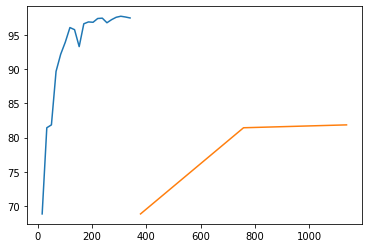

In [31]:
plt.plot(async_time_series, acc_list[:20])
plt.plot(sync_time_series[:3], acc_list[:3])